In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# reading in the data (2020 Collection Year Incident-Level Extract File)
data = pd.read_csv("38090-0005-Data.tsv",sep='\t')

In [6]:
# building a model using one hot encoding to convert categorical variables

data2 = pd.get_dummies(data, columns=['V2143', 'V2036'])

#print(data['V2143'].unique())
#print(data['V2036'].unique())

feature_names = ['V2143_2', 'V2143_1', 'V2143_3', 'V2036_1', 'V2036_2', 'V2033']
X2 = data2[feature_names]
y2 = data2.V4399

# splitting the data
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.25,random_state=0)

# model development and prediction
# instantiate model
logreg2 = LogisticRegression()

# fit the model with data
logreg2.fit(X2_train,y2_train)

# predicting
y2_pred = logreg2.predict(X2_test)

#y_pred

# confusion matrix
cnf_matrix = metrics.confusion_matrix(y2_test,y2_pred)
print(cnf_matrix)

# evaluation metrics
print("Accuracy: ",metrics.accuracy_score(y2_test,y2_pred))

[[   0  708    0    0]
 [   0 1282    0    0]
 [   0   18    0    0]
 [   0    3    0    0]]
Accuracy:  0.6374937841869717


/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# performing boosting using GradientBoostingClassifier

data2 = pd.get_dummies(data, columns=['V2143', 'V2036'])

feature_names = ['V2143_2', 'V2143_1', 'V2143_3', 'V2036_1', 'V2036_2', 'V2033']
X2 = data2[feature_names]
y2 = data2.V4399

X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.25,random_state=0)

clf = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0).fit(X2_train, y2_train)
clf.score(X2_test, y2_test)

0.6374937841869717

In [10]:
# performing boosting using GradientBoostingClassifier for all important features

data2 = pd.get_dummies(data, columns=['V2143','V2036','V2020','V3071','V2125','V4025','V4049',
                                      'V4127','V4184','V4234','V4235','V4484','V4524','V4525','V4526AA','V2026'])

feature_names = ['V2143_2', 'V2143_1', 'V2143_3', 'V2036_1', 'V2036_2','V2020_1','V2020_2','V2020_3','V2020_4','V2020_5'
,'V2020_6','V2020_7','V2020_8','V2020_11','V2020_12','V3071_1','V3071_2','V2125_1','V2125_2',
                 'V4025_1','V4025_2','V4049_1','V4049_2','V4127_1','V4127_2','V4184_1','V4184_2','V4234_1','V4234_2','V4235_1',
                 'V4235_2','V4484_1','V4484_2','V4524_1','V4524_2','V4525_1','V4525_2','V4526AA_1','V4526AA_2','V4526AA_3',
                 'V2026_1','V2026_2','V2026_3','V2026_4','V2026_5','V2026_6','V2026_7','V2026_8','V2026_9','V2026_10',
                 'V2026_11','V2026_12','V2026_13','V2026_15','V2026_16','V2026_17','V2026_18','V2033','V2071',
                 'V2072','V4016','V4364']

X2 = data2[feature_names]
y2 = data2.V4399

X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.25,random_state=0)

#clf = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0).fit(X2_train, y2_train)
#clf.score(X2_test, y2_test)

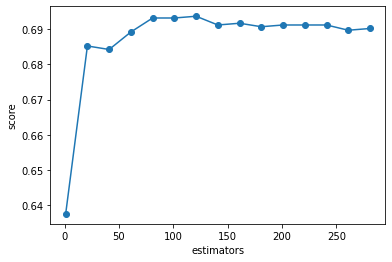

In [28]:
# plotting n_estimators

score_array=[]
for estimator_value in range(1,300,20):
    model = GradientBoostingClassifier(n_estimators=estimator_value,learning_rate=0.25,max_depth=1,random_state=0).fit(X2_train, y2_train)
    score_array.append(model.score(X2_test, y2_test))

plt.xlabel('estimators')
plt.ylabel('score')
plt.plot(np.arange(1,300,20),score_array,"o-")

In [29]:
clf = GradientBoostingClassifier(n_estimators=100,learning_rate=0.25,max_depth=1,random_state=0).fit(X2_train, y2_train)
clf.score(X2_test, y2_test)

0.6951765290900049

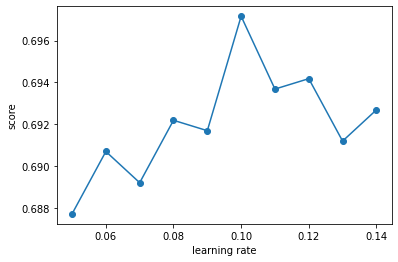

In [30]:
# plotting learning_rate

score_array=[]
for learning_value in np.arange(0.05,0.15,0.01):
    model = GradientBoostingClassifier(n_estimators=275,learning_rate=learning_value,max_depth=1,random_state=0).fit(X2_train, y2_train)
    score_array.append(model.score(X2_test, y2_test))

plt.xlabel('learning rate')
plt.ylabel('score')
plt.plot(np.arange(0.05,0.15,0.01),score_array,"o-")

In [31]:
clf = GradientBoostingClassifier(n_estimators=275,learning_rate=0.1,max_depth=1,random_state=0).fit(X2_train, y2_train)
clf.score(X2_test, y2_test)

0.6971655892590751

In [11]:
# best combination - learning rate = 0.1 and n_estimators = 275 

In [12]:
# using more features to perform boosting using GradientBoostingClassifier

In [13]:
data['V4529'].unique()

array([55, 56, 54, 57, 17, 11, 58, 12, 40, 14, 32, 10,  1, 41, 31, 59, 20,
       33, 13,  5,  7, 15,  9,  2, 23,  6, 19,  8,  4, 18, 16,  3, 22, 21])

In [14]:
data2 = pd.get_dummies(data, columns=['V2143','V2036','V2020','V3071','V2125','V4025','V4049',
                                      'V4127','V4184','V4234','V4235','V4484','V4524','V4525','V4526AA','V2026','V4017',
                                      'V2034','V2040A','V2047','V2132','V3024','V3046','V3058','V3074','YEARQ','V4048',
                                      'V4095','V4051','V4052','V4053','V4054','V4055','V4056','V4057','V4060','V4062',
                                      'V4064','V4066','V4067','V4068','V4070','V4071','V4072','V4073','V4075',
                                     'V4078','V4080','V4081','V4082','V4083','V4084','V4085','V4086','V4087','V4088',
                                      'V4089','V4090','V4091','V4094','V4095','V4096','V4097','V4098','V4099','V4100',
                                      'V4101','V4102','V4103','V4104','V4105','V4106','V4107','V4124','V4529'])

feature_names = ['V2143_2', 'V2143_1', 'V2143_3', 'V2036_1', 'V2036_2','V2020_1','V2020_2','V2020_3','V2020_4','V2020_5'
                ,'V2020_6','V2020_7','V2020_8','V2020_11','V2020_12','V3071_1','V3071_2','V2125_1','V2125_2','V4025_1',
                 'V4025_2','V4049_1','V4049_2','V4127_1','V4127_2','V4184_1','V4184_2','V4234_1','V4234_2','V4235_1',
                 'V4235_2','V4484_1','V4484_2','V4524_1','V4524_2','V4525_1','V4525_2','V4526AA_1','V4526AA_2',
                 'V4526AA_3','V2026_1','V2026_2','V2026_3','V2026_4','V2026_5','V2026_6','V2026_7','V2026_8','V2026_9',
                 'V2026_10','V2026_11','V2026_12','V2026_13','V2026_15','V2026_16','V2026_17','V2026_18','V2033','V2071',
                 'V2072','V4016','V4364','V4017_1','V4017_2','V2034_1','V2034_2','V2034_3','V2034_4','V2034_5','V2040A_1',
                'V2040A_5','V2040A_3','V2040A_4','V2040A_2','V2040A_6','V2040A_7','V2040A_8','V2040A_10','V2040A_15',
                 'V2040A_11','V2040A_14','V2040A_19','V2040A_16','V2040A_12','V2040A_18','V2040A_17','V2040A_13',
                 'V2040A_9','V2040A_20','V2047_42','V2047_41','V2047_10','V2047_28','V2047_27','V2047_43','V2047_44',
                 'V2047_11','V2047_40','V2047_9','V2047_45','V2047_7','V2047_8','V2047_0','V2047_6','V2047_3','V2047_2',
                 'V2047_1','V2047_4','V2047_5','V2132_4','V2132_1','V2132_2','V2132_3','V2132_0','V3024_1','V3024_2','V3046_2',
                 'V3046_1','V3046_3','V3058_1','V3058_2','V3074_11','V3074_12','V3074_27','V3074_2','V3074_8','V3074_9',
                'V3074_16','V3074_3','V3074_10','V3074_17','V3074_14','V3074_18','V3074_6','V3074_1','V3074_20','V3074_5',
                'V3074_22','V3074_24','V3074_21','V3074_25','V3074_13','YEARQ_2020.1','YEARQ_2020.2','YEARQ_2020.3',
                 'YEARQ_2020.4','V4048_1','V4048_2','V4095_0','V4095_1','V4051_0','V4051_1','V4052_0','V4052_1','V4053_0',
                'V4053_1','V4054_0','V4054_1','V4055_0','V4055_1','V4056_0','V4056_1','V4057_0','V4057_1','V4060_1',
                 'V4060_2','V4062_1','V4062_2','V4064_1','V4064_2','V4066_0','V4066_1','V4067_0','V4067_1','V4068_0','V4068_1',
                 'V4070_0','V4070_1','V4071_0','V4071_1','V4072_0','V4072_1','V4073_0','V4073_1','V4075_0','V4075_1','V4078_0',
                 'V4078_1','V4080_0', 'V4080_1','V4081_0','V4081_1','V4082_0','V4082_1','V4083_0','V4083_1','V4084_0','V4084_1',
                 'V4085_0','V4085_1','V4086_0','V4086_1','V4087_0','V4087_1','V4088_0','V4088_1','V4089_0','V4089_1',
                 'V4090_0','V4090_1','V4091_0','V4091_1','V4094_0','V4094_1','V4095_0','V4095_1','V4096_0','V4096_1',
                'V4097_0','V4097_1','V4098_0','V4098_1','V4099_0','V4099_1','V4100_0','V4100_1','V4101_0','V4101_1',
                'V4102_0','V4102_1','V4103_0','V4103_1','V4104_0','V4104_1','V4105_0','V4105_1','V4106_0','V4106_1',
                'V4107_0','V4107_1','V4124_2','V4124_4','V4124_7','V4124_8','V4124_10','V4529_55','V4529_56','V4529_54','V4529_57',
                'V4529_17','V4529_11','V4529_58','V4529_12','V4529_40','V4529_14','V4529_32','V4529_10','V4529_1','V4529_41','V4529_31',
                'V4529_59','V4529_20','V4529_33','V4529_13','V4529_5','V4529_7','V4529_15','V4529_9','V4529_2','V4529_23','V4529_6',
                'V4529_19','V4529_8','V4529_4','V4529_18','V4529_16','V4529_3','V4529_22','V4529_21']

X2 = data2[feature_names]
y2 = data2.V4399

X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.25,random_state=0)

#clf = GradientBoostingClassifier(n_estimators=275,learning_rate=0.1,max_depth=1,random_state=0).fit(X2_train, y2_train)
#clf.score(X2_test, y2_test)

# ask how to remove values from numeric (which represent out of universe ; residue)
# ask how to do above data preprocessing
# look through scikit learn to extract most useful features (weighted/ranked by usefulness)

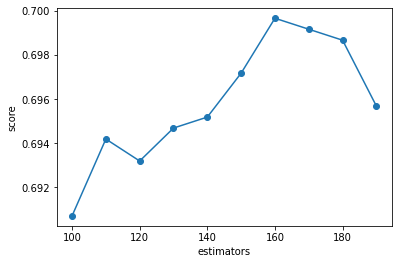

In [17]:
# plotting n_estimators

score_array=[]
for estimator_value in range(100,200,10):
    model = GradientBoostingClassifier(n_estimators=estimator_value,learning_rate=0.1,max_depth=1,random_state=0).fit(X2_train, y2_train)
    score_array.append(model.score(X2_test, y2_test))

plt.xlabel('estimators')
plt.ylabel('score')
plt.plot(np.arange(100,200,10),score_array,"o-")

In [19]:
clf = GradientBoostingClassifier(n_estimators=160,learning_rate=0.1,max_depth=1,random_state=0).fit(X2_train, y2_train)
clf.score(X2_test, y2_test)

0.6996519144704128

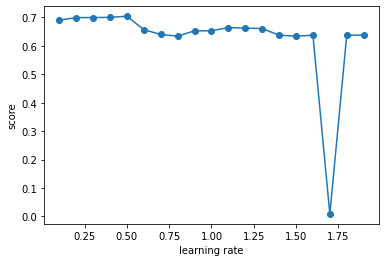

In [20]:
# plotting learning_rate

score_array=[]
for learning_value in np.arange(0.1,2,0.1):
    model = GradientBoostingClassifier(n_estimators=100,learning_rate=learning_value,max_depth=1,random_state=0).fit(X2_train, y2_train)
    score_array.append(model.score(X2_test, y2_test))

plt.xlabel('learning rate')
plt.ylabel('score')
plt.plot(np.arange(0.1,2,0.1),score_array,"o-")

In [24]:
clf = GradientBoostingClassifier(n_estimators=160,learning_rate=0.5,max_depth=1,random_state=0).fit(X2_train, y2_train)
clf.score(X2_test, y2_test)

0.704624564893088

In [ ]:
# learning_rate = 0.5
# n_estimators = 160
# best combination giving 0.705